# Decoding cell identity based on kinetic parameters of pancreatic endocrinogenesis data

Here is the case study for pancreatic endocrinogenesis dataset. 8 cell types were included.

## Import Packages

To run the notebook locally, [Getting Started](link) could be referred to install the environment and dependencies.

In [3]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
# srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Velocity Estimation for Sample Genes

Our analysis is based on PancreaticEndocrinogenesis.csv. To estimate the velocity on your own data, read your csv file with cell_type_u_s=pd.read_csv('path/cell_type_u_sz_file.csv'). Columns of gene_name, unsplice, splice, cellID, clusters, embedding1, and embedding2 are needed. to an AnnData object with adata = scv.read('path/file.loom', cache=True). The method of transfering adata to the accepted cell_type_u_sz is described in [Getting Started] section.

In [17]:
%autoreload 2

cell_type_u_s_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv'
# cell_type_u_s_path='/Users/chen.weiqing/code/celldancer/PancreaticEndocrinogenesis.csv'
# cell_type_u_s_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv'
# cell_type_u_s_path = '/Users/chen.weiqing/code/celldancer/pancreas/velocity_result'
cell_type_u_s=pd.read_csv(cell_type_u_s_path)
cell_type_u_s

,gene_name,unsplice,splice,cellID,clusters,embedding1,embedding2
0,Sntg1,0.045809,0.000000,AAACCTGAGAGGGATA,Pre-endocrine,6.143066,-0.063644
1,Sntg1,0.058600,0.000000,AAACCTGAGCCTTGAT,Ductal,-9.906417,0.197778
2,Sntg1,0.058696,0.000000,AAACCTGAGGCAATTA,Alpha,7.559791,0.583762
3,Sntg1,0.198549,0.000000,AAACCTGCATCATCCC,Ductal,-11.283765,4.218998
4,Sntg1,0.000000,0.000000,AAACCTGGTAAGTGGC,Ngn3 high EP,1.721565,-4.753407
...,...,...,...,...,...,...,...
7391995,Erdr1,0.461130,0.505213,TTTGTCAAGTGACATA,Pre-endocrine,4.768472,-1.388353
7391996,Erdr1,0.643907,0.531752,TTTGTCAAGTGTGGCA,Ngn3 high EP,-1.873335,-4.182650
7391997,Erdr1,0.626258,0.406073,TTTGTCAGTTGTTTGG,Ductal,-9.882250,-0.105594
7391998,Erdr1,0.409493,0.514864,TTTGTCATCGAATGCT,Alpha,6.612424,4.531895


Sample genes could be used to calculate velocity. 

In [20]:
%autoreload 2
for permutation_ratio in [0.5]:
    print(permutation_ratio)
    max_epoches=200
    check_val_every_n_epoch=10
    patience=3
    permutation_ratio=permutation_ratio
    speed_up=True
    norm_u_s=True
    norm_cell_distribution=True
    n_jobs=10
    save_path=None

    gene_list=['Sulf2','Grin2b','Ppfia2','Cdh9',"Ank","Abcc8","Sulf2","Tcp11","Nfib","Ppp3ca",
            "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
            "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
            "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
            "Adk","Smoc1","Mapre3","Pim2","Tspan7",
            "Top2a","Rap1b"]
    # gene_list=None
    # gene_list=list(cell_type_u_s.gene_name.drop_duplicates())
    # Velocity Estimation
    loss_df, cellDancer_df=velocity(cell_type_u_s,\
                                 gene_list=gene_list,\
                                 max_epoches=max_epoches,\
                                 check_val_every_n_epoch=check_val_every_n_epoch,\
                                 patience=patience,\
                                 permutation_ratio=permutation_ratio,\
                                 speed_up=speed_up,\
                                 norm_u_s=norm_u_s,\
                                 norm_cell_distribution=norm_cell_distribution,\
                                 n_jobs=n_jobs,\
                                 save_path=save_path)
    cellDancer_df


0.5
Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-05-30 12-27-10 as the output path.
['Ppfia2', 'Grin2b', 'Cdh9']  not in the data cell_type_u_s
Arranging genes for parallel job.
28  genes were arranged to  1  portion.


Velocity Estimation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:33<00:00, 33.10s/it]


## Sample Genes' Velocity Plot

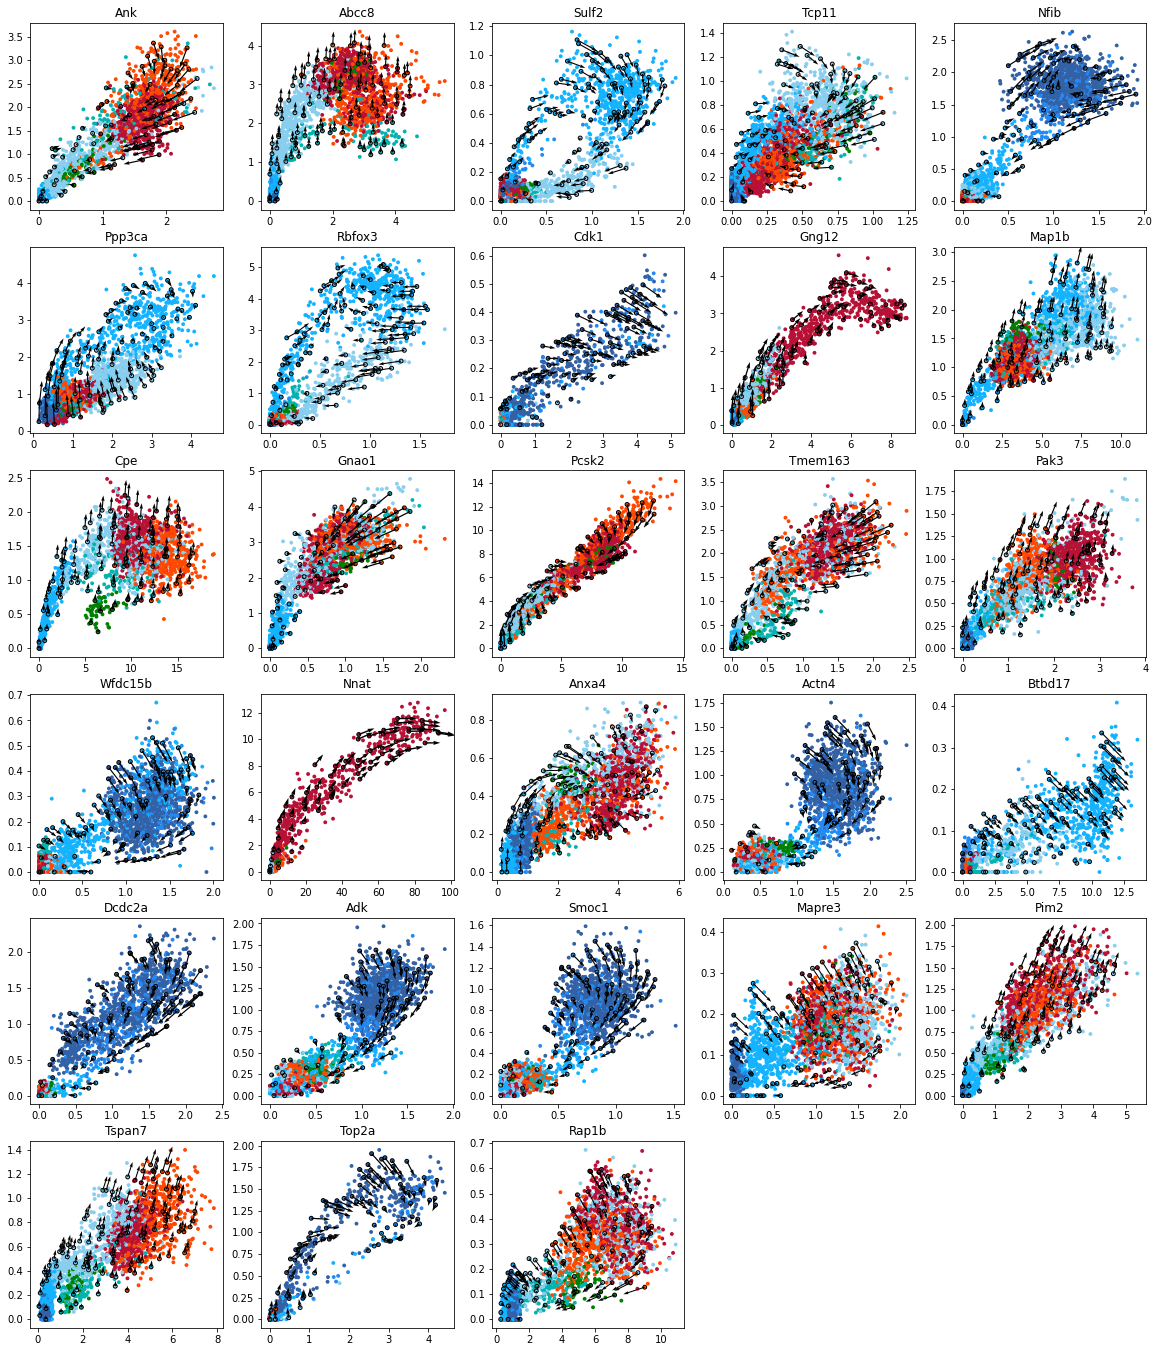

In [21]:
%autoreload 2

gene_list=["Ank","Abcc8","Sulf2","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b"]

ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=cdplt.colormap.colormap_pancreas,
        alpha=1, 
        s = 15,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()

## Load velocity estimation result of 2000 genes

In [5]:
#detail_result_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/pancreas/velocity_result/velocity_result_all_genes_with_bin/2000_smooth/combined_detail/combined_detail.csv'
#cellDancer_df_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes_with_bin/combined_detail/combined_detail.csv'
cellDancer_df_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/pancreas/velocity_result/fin_parameter_0529/cell_dancer_velocity_2022-05-28 19-03-50/celldancer_estimation.csv'
#detail_result_path = '/Users/chen.weiqing/code/celldancer/pancreas/combined_detail.csv'

cellDancer_df=pd.read_csv(cellDancer_df_path)
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Scaper,0.489151,0.211323,0.486841,0.185478,0.334391,0.629880,0.647696,0.043435,AAACCTGAGAGGGATA,Pre-endocrine,6.143066,-0.063644
1,1,Scaper,0.278262,0.125742,0.293904,0.107517,0.224909,0.626946,0.648537,0.043435,AAACCTGAGCCTTGAT,Ductal,-9.906417,0.197778
2,2,Scaper,0.374380,0.298116,0.348888,0.197525,0.213979,0.648890,0.665279,0.043435,AAACCTGAGGCAATTA,Alpha,7.559791,0.583762
3,3,Scaper,0.320497,0.198031,0.318165,0.146120,0.219611,0.636208,0.655523,0.043435,AAACCTGCATCATCCC,Ductal,-11.283765,4.218998
4,4,Scaper,0.239145,0.141970,0.251417,0.106599,0.192050,0.631560,0.652837,0.043435,AAACCTGGTAAGTGGC,Ngn3 high EP,1.721565,-4.753407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7391995,3691,Tmem63a,0.000000,0.136270,0.000447,0.125414,0.005472,0.110095,0.067564,0.045492,TTTGTCAAGTGACATA,Pre-endocrine,4.768472,-1.388353
7391996,3692,Tmem63a,0.028708,0.000000,0.021286,0.022931,0.017270,0.100517,0.072741,0.045492,TTTGTCAAGTGTGGCA,Ngn3 high EP,-1.873335,-4.182650
7391997,3693,Tmem63a,0.000000,0.312690,0.000200,0.288797,0.002445,0.116196,0.064809,0.045492,TTTGTCAGTTGTTTGG,Ductal,-9.882250,-0.105594
7391998,3694,Tmem63a,0.028052,0.154164,0.019519,0.165354,0.008143,0.107124,0.069812,0.045492,TTTGTCATCGAATGCT,Alpha,6.612424,4.531895


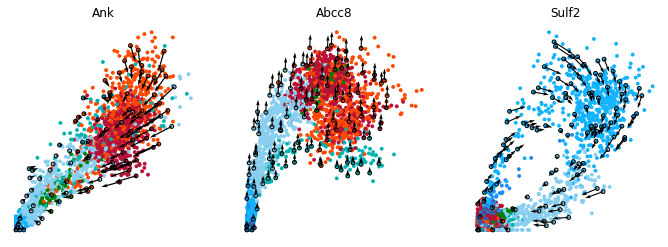

In [9]:
%autoreload 2

gene_list=["Ank","Abcc8","Sulf2","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b"][0:3]

ncols=5

height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=cdplt.colormap.colormap_pancreas,
        alpha=1, 
        s = 15,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')
plt.show()

In [ ]:
%autoreload 2

gene_list_full=["Ank","Abcc8","Sulf2","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b"][0:3]
gene_list_full=list(cellDancer_df.gene_name.drop_duplicates())
for enu,j in enumerate(gene_list_full):
    print(enu)
    fig = plt.figure(figsize=(4,4))
    gene_list=[j]
    for i in range(len(gene_list)):
        ax = fig.add_subplot()
        cdplt.gene.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=cellDancer_df,
            custom_xlim=None,
            custom_ylim=None,
            colors=cdplt.colormap.colormap_pancreas,
            alpha=1, 
            s = 20,
            velocity=True,
            gene=gene_list[i])

        ax.set_title(gene_list[i])
        ax.axis('on')
        plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/pancreas/velocity_result/fin_parameter_0529/cell_dancer_velocity_2022-05-28 19-03-50/gene_velocity/'+gene_list[i]+'.pdf')


## Compute Cell Velocity

(genes, cells): (2000, 3696)
After downsampling, there are  845 cells.


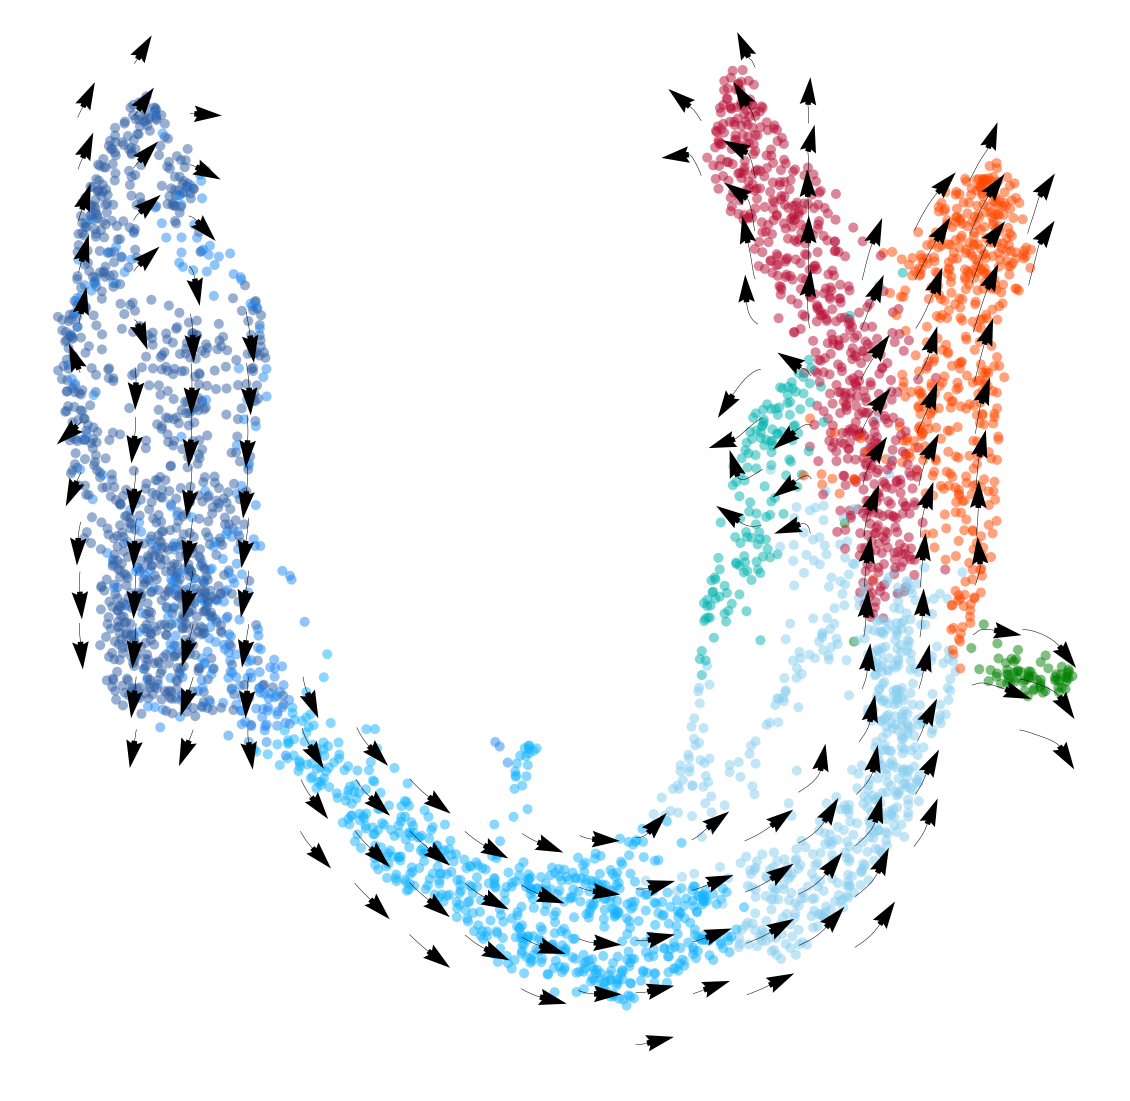

In [11]:
%autoreload 2

# set parameters
projection_neighbor_choice='embedding'
expression_scale=None
projection_neighbor_size=100
speed_up=(60,60)

arrow_grid=(20,20)
dt = 0.01
t_total = 10000
n_repeats = 10

# compute cell velocity
cellDancer_df=compute(cellDancer_df=cellDancer_df,
              projection_neighbor_choice=projection_neighbor_choice,
              expression_scale=expression_scale,
              projection_neighbor_size=projection_neighbor_size,
              speed_up=speed_up)

# plot cell velocity
fig, ax = plt.subplots(figsize=(20,20))
clusters = cellDancer_df['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,
                        cellDancer_df, 
                        colors=cdplt.colormap.colormap_pancreas, 
                        alpha=0.5, 
                        s=100,
                        velocity=True,
                        arrow_grid=arrow_grid,
                       min_mass=5)
ax.axis('off')
plt.show()

In [10]:
%autoreload 2

cell_time = dict()
dt = 0.01
#t_total = {dt:int(10/dt)} 
t_total = {0.01: 1000}
n_repeats = 10

grid = (20,20)

load_cellDancer = pseudo_time(
    load_cellDancer=cellDancer_df, 
    grid=grid, 
    dt=dt, 
    t_total=t_total[dt], 
    n_repeats=n_repeats, 
    downsample_step=downsample_step,
    n_paths = 3,
    psrng_seeds_diffusion=[i for i in range(n_repeats)],
    activate_umap_paths_divider=False,
    n_jobs=12)

NameError: name 'downsample_step' is not defined

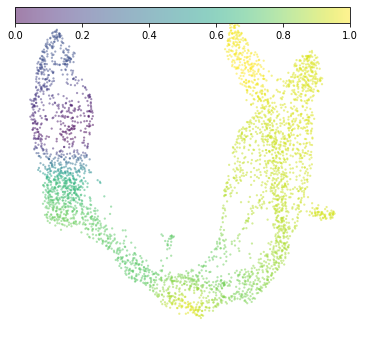

In [138]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = cellDancer_df['clusters'].drop_duplicates().to_list()
im=cdplt.cell.scatter_cell(ax,cellDancer_df, colors='pseudotime', alpha=0.5, 
             velocity=False)
ax.axis('off')
plt.show()

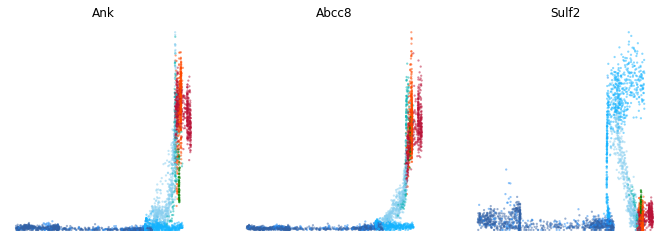

In [144]:
import math
ncols=5
fig = plt.figure(figsize=(20,4))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='spliced',
        cellDancer_df=cellDancer_df,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_pancreas,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

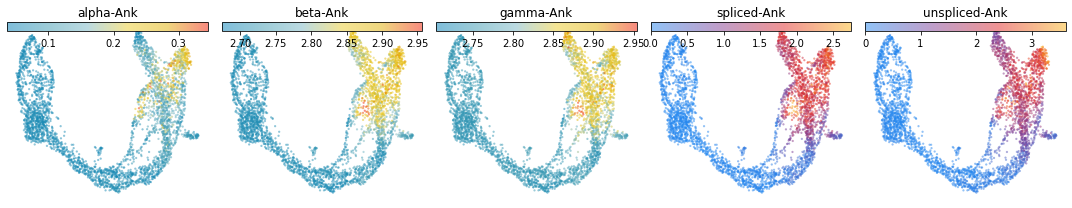

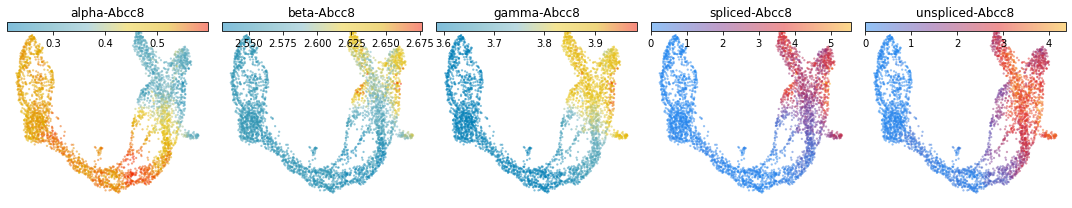

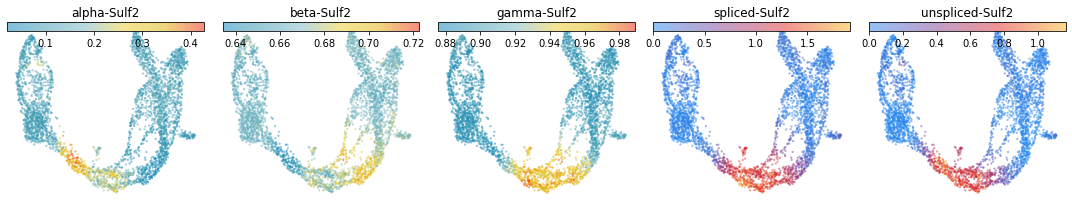

In [117]:
%autoreload 2


for gene in gene_list[0:3]:
    fig, ax = plt.subplots(ncols=5, figsize=(15,3))
    cdplt.cell.scatter_cell(ax[0],cellDancer_df, colors='alpha', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[1],cellDancer_df, colors='beta', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[2],cellDancer_df, colors='gamma', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[3],cellDancer_df, colors='spliced', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[4],cellDancer_df, colors='unspliced', 
                 gene=gene, velocity=False)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')
    ax[4].axis('off')
    ax[0].set_title('alpha-'+gene)
    ax[1].set_title('beta-'+gene)
    ax[2].set_title('gamma-'+gene)
    ax[3].set_title('spliced-'+gene)
    ax[4].set_title('unspliced-'+gene)
    plt.tight_layout()
    plt.show()

## UMAP using alpha, beta, and gamma

In [108]:
cellDancer_df=embedding(cellDancer_df,'alpha')
cellDancer_df=embedding(cellDancer_df,'beta')
cellDancer_df=embedding(cellDancer_df,'gamma')
cellDancer_df=embedding(cellDancer_df,'alpha_beta_gamma')

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


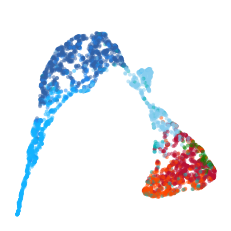

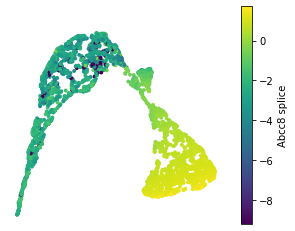

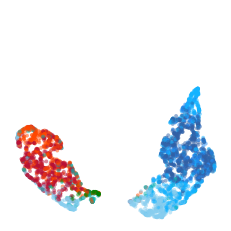

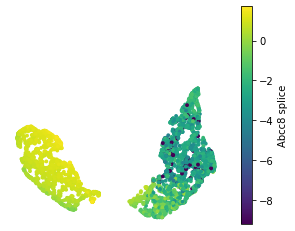

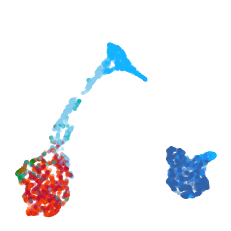

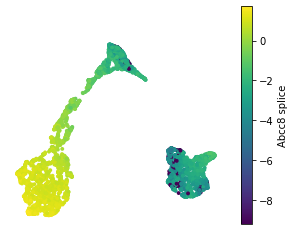

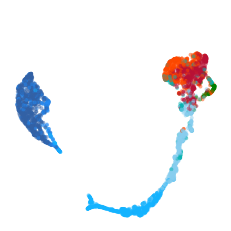

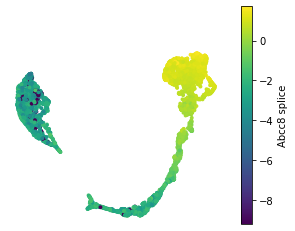

In [116]:
cdplt.cell.plot_kinetic_para('alpha',cellDancer_df,color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('alpha',cellDancer_df,gene='Abcc8',color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('beta',cellDancer_df,color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('beta',cellDancer_df,gene='Abcc8',color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('gamma',cellDancer_df,color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('gamma',cellDancer_df,gene='Abcc8',color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('alpha_beta_gamma',cellDancer_df,color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('alpha_beta_gamma',cellDancer_df,gene='Abcc8',color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

In [36]:
from celldancer.utilities import rank_rsquare

In [49]:
%load_ext autoreload
%autoreload 2

cluster_choice=list(cellDancer_df.clusters.drop_duplicates())
rsquare_rank=rank_rsquare(cellDancer_df,gene_list=gene_list,cluster_choice=cluster_choice)
rsquare_rank

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Calculate rsquare: 100%|████████████████████████| 28/28 [00:06<00:00,  4.49it/s]


,gene_name,r_square
0,Btbd17,0.976597
1,Sulf2,0.963845
2,Rbfox3,0.951194
3,Wfdc15b,0.947987
4,Map1b,0.939678
5,Nfib,0.927527
6,Adk,0.927370
7,Ppp3ca,0.920053
8,Smoc1,0.918295
9,Gnao1,0.916941
